In [1]:
# Memanggil Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:\Python\\climate_change_agriculture_dataset.csv', sep=',')
df.rename(columns={'CO2 Levels': 'CO2_Levels', 'Crop Yield':'Crop_Yield', 'Soil Health': 'Soil_Health', 'Extreme Weather Events' : 'Extreme_Weather_Events',
                  'Crop Disease Incidence' : 'Crop_Disease_Incidence', 'Water Availability' : 'Water_Availability',
                  'Food Security' : 'Food_Security', 'Economic Impact' : 'Economic_Impact'}, inplace=True)

df.head()

,Temperature,Precipitation,CO2_Levels,Crop_Yield,Soil_Health,Extreme_Weather_Events,Crop_Disease_Incidence,Water_Availability,Food_Security,Economic_Impact
0,7,59,329,483,10,Drought,Low,High,Low,High
1,39,20,426,679,8,Heatwave,High,Low,High,Low
2,18,46,403,587,5,Flood,Low,Medium,Low,Medium
3,9,91,356,220,5,Heatwave,Medium,Medium,High,Medium
4,35,12,325,538,1,Storm,Medium,Medium,High,High


In [2]:
df.shape

(1000, 10)

In [3]:
null_total = df.isnull().sum().sort_values(ascending=False)
null_total

Temperature               0
Precipitation             0
CO2_Levels                0
Crop_Yield                0
Soil_Health               0
Extreme_Weather_Events    0
Crop_Disease_Incidence    0
Water_Availability        0
Food_Security             0
Economic_Impact           0
dtype: int64

In [4]:
# Fungsi untuk mengubah jenis cuaca ke nomor kategorikal
# Heatwave (Gelombang Panas) = 0, Drought (Kekeringan) = 1, Storm (Badai) = 2, Flood (Banjir) = 3
def konversi_cuaca(cuaca):
    if cuaca == "Heatwave":
        return 0
    elif cuaca == "Drought":
        return 1
    elif cuaca == "Storm":
        return 2
    elif cuaca == "Flood":
        return 3
    else:
        return None
    
df['Extreme_Weather_Events'] = df['Extreme_Weather_Events'].apply(konversi_cuaca)

In [5]:
# Fungsi untuk mengubah nilai kesuburan tanah (pH) ke kategori subur
# Kurang Subur : 1-5 & 9-10
# Subur : 6-8
def konversi_subur(angka_subur):
    if 1 <= angka_subur <= 5 or 9 <= angka_subur <= 10:
        return "Kurang Subur"
    elif 6 <= angka_subur <= 8:
        return "Subur"
    else:
        return None

df['Soil_Health'] = df['Soil_Health'].apply(konversi_subur)

In [6]:
df.head(5)

,Temperature,Precipitation,CO2_Levels,Crop_Yield,Soil_Health,Extreme_Weather_Events,Crop_Disease_Incidence,Water_Availability,Food_Security,Economic_Impact
0,7,59,329,483,Kurang Subur,1,Low,High,Low,High
1,39,20,426,679,Subur,0,High,Low,High,Low
2,18,46,403,587,Kurang Subur,3,Low,Medium,Low,Medium
3,9,91,356,220,Kurang Subur,0,Medium,Medium,High,Medium
4,35,12,325,538,Kurang Subur,2,Medium,Medium,High,High


In [7]:
# Fungsi untuk mengubabah tingkat kesuburan tanah ke nomor kategorikal
# Kurang Subur = 0, Subur = 1 :
def kategori_subur(tingkat_subur):
    if tingkat_subur == "Kurang Subur":
        return 0
    elif tingkat_subur == "Subur":
        return 1
    else:
        return None
    
df['Soil_Health'] = df['Soil_Health'].apply(kategori_subur)
df['Soil_Health']

# Persentase kesuburan tanah pada peristiwa Heatwave"
heatwave = df.loc[df.Extreme_Weather_Events == 0]["Soil_Health"]
persentase_heatwave = (sum(heatwave)/len(heatwave))*100
print("Persentase kesuburan tanah pada peristiwa Heatwave (Gelombang Panas) adalah", persentase_heatwave, "%")

# Persentase kesuburan tanah pada peristiwa Drought"
drought = df[df['Extreme_Weather_Events'] == 1]['Soil_Health']
persentase_drought = (sum(drought)/len(drought))*100
print("Persentase kesuburan tanah pada peristiwa Drought (Kekeringan) adalah", round(persentase_drought, 5), "%")

# Persentase kesuburan tanah pada peristiwa Storm"
storm = df[df['Extreme_Weather_Events'] == 2]['Soil_Health']
persentase_storm = (sum(storm)/len(storm))*100
print("Persentase kesuburan tanah pada peristiwa Storm (Badai) adalah", round(persentase_storm, ), "%")

# Persentase kesuburan tanah pada peristiwa Flood"
flood = df[df['Extreme_Weather_Events'] == 3]['Soil_Health']
persentase_flood = (sum(flood)/len(flood))*100
print("Persentase kesuburan tanah pada peristiwa Flood (Banjir) adalah", round(persentase_flood, 5), "%")

Persentase kesuburan tanah pada peristiwa Heatwave (Gelombang Panas) adalah 28.85375494071146 %
Persentase kesuburan tanah pada peristiwa Drought (Kekeringan) adalah 30.36437 %
Persentase kesuburan tanah pada peristiwa Storm (Badai) adalah 32 %
Persentase kesuburan tanah pada peristiwa Flood (Banjir) adalah 34.5098 %


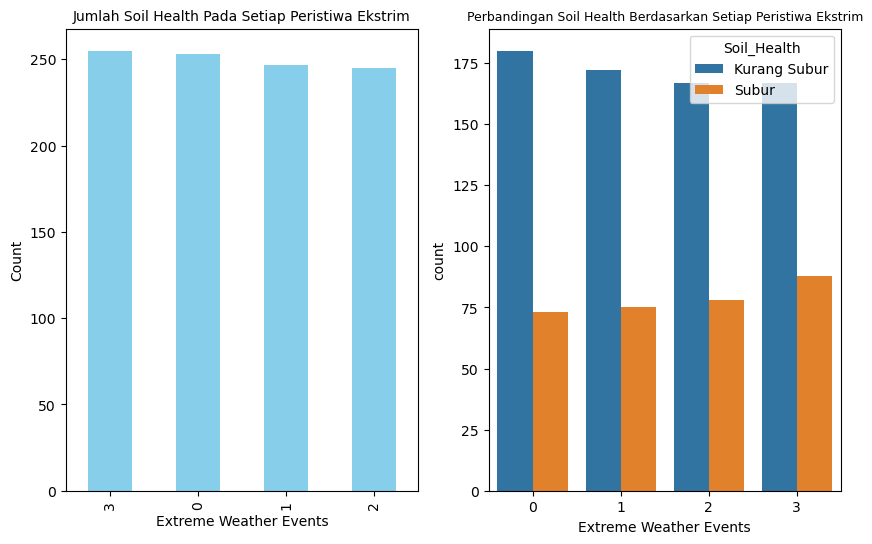

In [8]:
# Membuat Grafik Perbandingan Soil Health Berdasarkan Setiap Peristiwa Ekstrim
df['Soil_Health'] = df['Soil_Health'].map({0:"Kurang Subur", 1:"Subur"})
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
df["Extreme_Weather_Events"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Jumlah Soil Health Pada Setiap Peristiwa Ekstrim", fontsize=10)
ax[0].set_xlabel("Extreme Weather Events")
ax[0].set_ylabel("Count")
sns.countplot(x="Extreme_Weather_Events", hue="Soil_Health", data=df, ax=ax[1])
ax[1].set_title("Perbandingan Soil Health Berdasarkan Setiap Peristiwa Ekstrim", fontsize=9)
ax[1].set_xlabel("Extreme Weather Events")
plt.show()

In [9]:
# Jumlah hasil panen pada peristiwa Heatwave
crop_yield_heatwave = df.loc[df.Extreme_Weather_Events == 0]["Crop_Yield"]
jumlah_crop_yield_heatwave = sum(crop_yield_heatwave)
print("Jumlah hasil panen pada peristiwa Heatwave (Gelombang Panas) adalah", jumlah_crop_yield_heatwave, "ton")

# Jumlah hasil panen pada peristiwa Drought
crop_yield_drought = df.loc[df.Extreme_Weather_Events == 1]["Crop_Yield"]
jumlah_crop_yield_drought = sum(crop_yield_drought)
print("Jumlah hasil panen pada peristiwa Drought (Kekeringan) adalah", jumlah_crop_yield_drought, "ton")

# Jumlah hasil panen pada peristiwa Storm
crop_yield_storm = df.loc[df.Extreme_Weather_Events == 2]["Crop_Yield"]
jumlah_crop_yield_storm = sum(crop_yield_storm)
print("Jumlah hasil panen pada peristiwa Storm (Badai) adalah", jumlah_crop_yield_storm, "ton")

# Jumlah hasil panen pada peristiwa Flood
crop_yield_flood = df.loc[df.Extreme_Weather_Events == 3]["Crop_Yield"]
jumlah_crop_yield_flood = sum(crop_yield_flood)
print("Jumlah hasil panen pada peristiwa Flood (Banjir) adalah", jumlah_crop_yield_flood, "ton")

Jumlah hasil panen pada peristiwa Heatwave (Gelombang Panas) adalah 133538 ton
Jumlah hasil panen pada peristiwa Drought (Kekeringan) adalah 130895 ton
Jumlah hasil panen pada peristiwa Storm (Badai) adalah 140305 ton
Jumlah hasil panen pada peristiwa Flood (Banjir) adalah 140759 ton


In [10]:
# Membuat DataFrame Jumlah Panen Pada Setiap Peristiwa
jumlah_panen_peristiwa = pd.DataFrame({'Peristiwa' : ['Heatwave', 'Drought', 'Storm', 'Flood'],
                                       'Jumlah Panen' : [jumlah_crop_yield_heatwave, jumlah_crop_yield_drought, jumlah_crop_yield_storm, jumlah_crop_yield_flood]})
jumlah_panen_peristiwa

,Peristiwa,Jumlah Panen
0,Heatwave,133538
1,Drought,130895
2,Storm,140305
3,Flood,140759


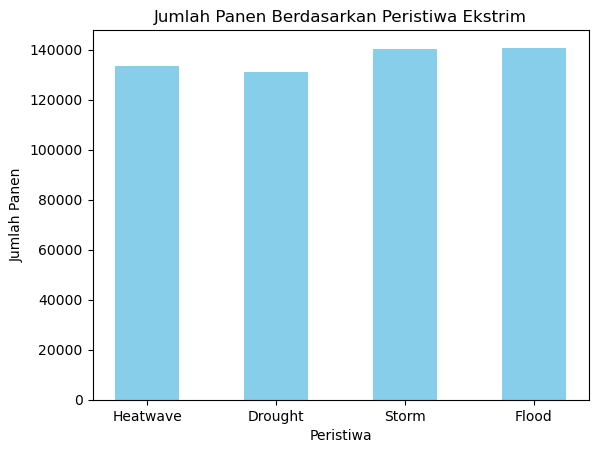

In [11]:
# Membuat Grafik Bar Chart Jumlah Panen Berdasarkan Peristiwa Ekstrim
plt.bar(jumlah_panen_peristiwa['Peristiwa'], jumlah_panen_peristiwa['Jumlah Panen'], width=0.5,color='skyblue')
plt.xlabel("Peristiwa")
plt.ylabel("Jumlah Panen")
plt.title("Jumlah Panen Berdasarkan Peristiwa Ekstrim")
plt.show()

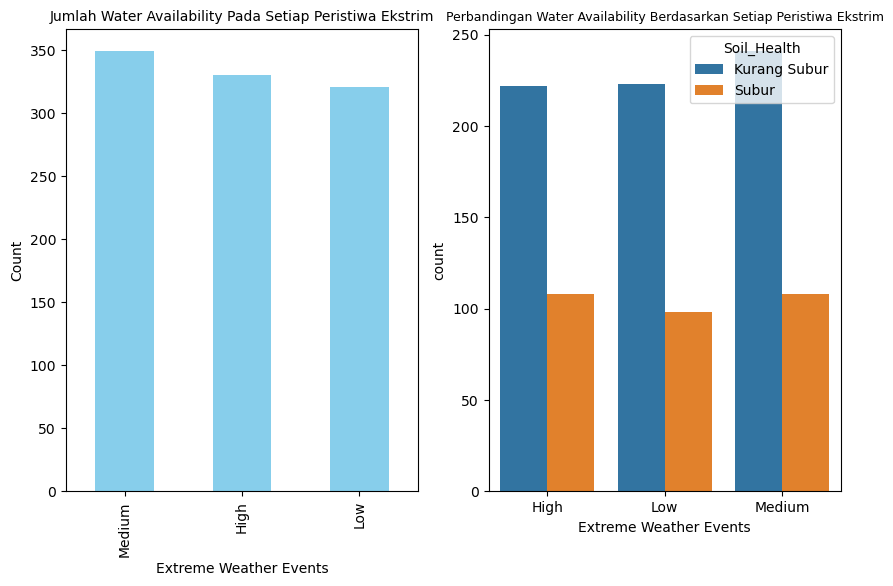

In [12]:
# Membuat Grafik Perbandingan Water Availability Berdasarkan Setiap Peristiwa Ekstrim
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
df["Water_Availability"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Jumlah Water Availability Pada Setiap Peristiwa Ekstrim", fontsize=10)
ax[0].set_xlabel("Extreme Weather Events")
ax[0].set_ylabel("Count")
sns.countplot(x="Water_Availability", hue="Soil_Health", data=df, ax=ax[1])
ax[1].set_title("Perbandingan Water Availability Berdasarkan Setiap Peristiwa Ekstrim", fontsize=9)
ax[1].set_xlabel("Extreme Weather Events")
plt.show()

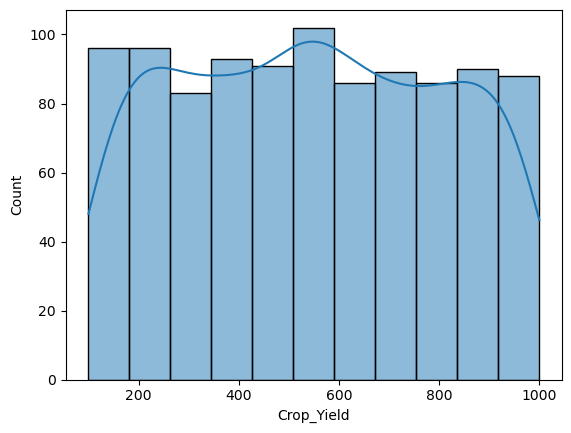

In [13]:
# Membuat Grafik Histogram pada Variabel Crop_Yield
sns.histplot(data=df, x='Crop_Yield', kde=True)
plt.show()

In [14]:
# Fungsi untuk mengubah tingkat air ke nomor kategorikal
# Low = 0, Medium = 1, High = 2 :
def konversi_air(tingkat_air):
    if tingkat_air == "Low":
        return 0
    elif tingkat_air == "Medium":
        return 1
    elif tingkat_air == "High":
        return 2
    else:
        return None

df['Water_Availability'] = df['Water_Availability'].apply(konversi_air)
df

,Temperature,Precipitation,CO2_Levels,Crop_Yield,Soil_Health,Extreme_Weather_Events,Crop_Disease_Incidence,Water_Availability,Food_Security,Economic_Impact
0,7,59,329,483,Kurang Subur,1,Low,2,Low,High
1,39,20,426,679,Subur,0,High,0,High,Low
2,18,46,403,587,Kurang Subur,3,Low,1,Low,Medium
3,9,91,356,220,Kurang Subur,0,Medium,1,High,Medium
4,35,12,325,538,Kurang Subur,2,Medium,1,High,High
...,...,...,...,...,...,...,...,...,...,...
995,6,63,367,648,Kurang Subur,0,Medium,0,High,Low
996,10,26,428,644,Subur,3,High,1,Low,Low
997,28,41,339,263,Kurang Subur,1,Low,0,High,Low
998,42,31,372,530,Kurang Subur,2,Low,1,Low,Low


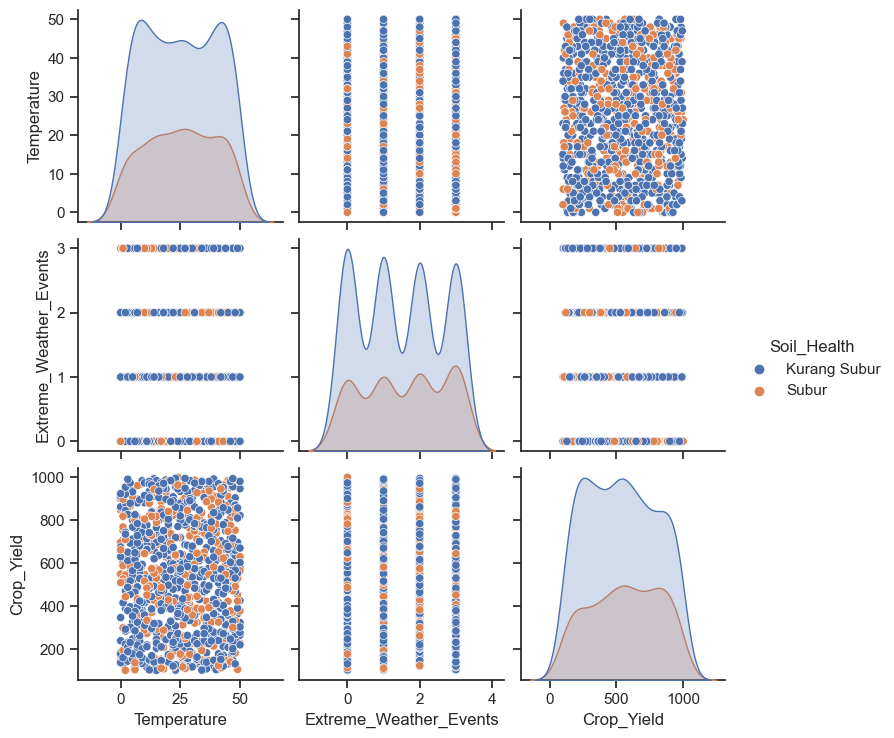

In [15]:
# Membuat Grafik Pairplot pada Variabel Temperature, Extreme_Weather_Events, Crop_Yield Berdasarkan Soil_Health
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['Temperature','Extreme_Weather_Events','Crop_Yield'],
hue="Soil_Health")
plt.show()

In [16]:
data = pd.read_csv('C:\Python\\climate_change_agriculture_dataset.csv', sep=',')
data

,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health,Extreme Weather Events,Crop Disease Incidence,Water Availability,Food Security,Economic Impact
0,7,59,329,483,10,Drought,Low,High,Low,High
1,39,20,426,679,8,Heatwave,High,Low,High,Low
2,18,46,403,587,5,Flood,Low,Medium,Low,Medium
3,9,91,356,220,5,Heatwave,Medium,Medium,High,Medium
4,35,12,325,538,1,Storm,Medium,Medium,High,High
...,...,...,...,...,...,...,...,...,...,...
995,6,63,367,648,5,Heatwave,Medium,Low,High,Low
996,10,26,428,644,7,Flood,High,Medium,Low,Low
997,28,41,339,263,10,Drought,Low,Low,High,Low
998,42,31,372,530,2,Storm,Low,Medium,Low,Low


In [21]:
# Mengetahui Korelasi pada Variabel Numerik
data['Economic Impact'] = data['Economic Impact'].map({"Low":0, "Medium":1,"High":2})
Tcorrelation = data.corr(method='pearson')
Tcorrelation

C:\Users\rr411\AppData\Local\Temp\ipykernel_12604\4114560760.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tcorrelation = data.corr(method='pearson')


,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health,Economic Impact
Temperature,1.000000,-0.031727,-0.025445,-0.021037,-0.051958,NaN
Precipitation,-0.031727,1.000000,0.000328,-0.012216,0.038810,NaN
CO2 Levels,-0.025445,0.000328,1.000000,0.032205,0.023255,NaN
Crop Yield,-0.021037,-0.012216,0.032205,1.000000,-0.008992,NaN
Soil Health,-0.051958,0.038810,0.023255,-0.008992,1.000000,NaN
Economic Impact,NaN,NaN,NaN,NaN,NaN,NaN


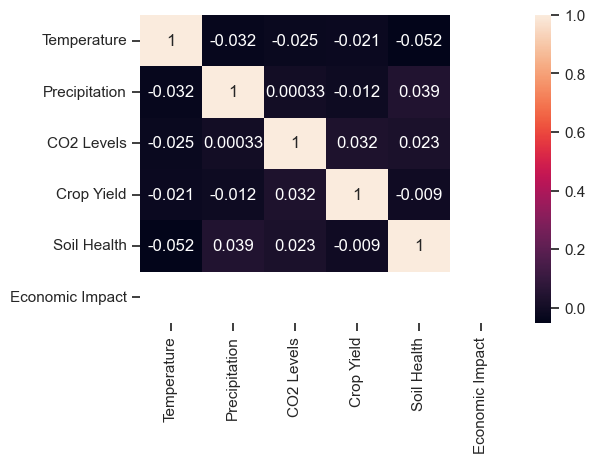

In [22]:
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(Tcorrelation, annot=True, xticklabels=Tcorrelation.columns, yticklabels=Tcorrelation.columns)
plt.show()